## Tarea - Detección de anomalias 

Daniel Conrado Monroy Madrid - 16012674

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd

In [10]:
df = pd.read_csv('estaturas - normales (1).csv')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
Estatura    21 non-null float64
Edad        17 non-null float64
dtypes: float64(2)
memory usage: 416.0 bytes


In [101]:
data = df.fillna(df['Edad'].mean()) ##Limpiar data (NaN´s de Edad)
data.head(7)

,Estatura,Edad
0,1.77,26.000000
1,1.74,31.000000
2,1.72,24.000000
3,1.78,27.117647
4,1.65,32.000000
5,1.66,27.117647
6,1.64,27.117647


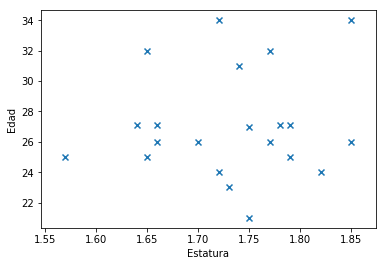

In [102]:
plt.scatter(data.iloc[:,0],data.iloc[:,1],marker="x")
plt.xlabel('Estatura')
plt.ylabel('Edad')
plt.show()

In [103]:
data.describe()

,Estatura,Edad
count,21.000000,21.000000
mean,1.731429,27.117647
std,0.073504,3.533870
min,1.570000,21.000000
25%,1.660000,25.000000
50%,1.740000,26.000000
75%,1.780000,27.117647
max,1.850000,34.000000


## Modelo - Anomaly Detection

In [46]:
from scipy.stats import norm

In [104]:
mean1 = np.mean(data.iloc[:,0])
mean2 = np.mean(data.iloc[:,1])

In [105]:
var1 = np.var(data.iloc[:,0])
var2 = np.var(data.iloc[:,1])

In [117]:
test_data = pd.read_csv('estaturas - anomalias.csv')

In [123]:
test_data

,Estatura,Edad
0,0.25,2.4
1,175.10,2.5
2,0.15,250.0
3,150.00,14.0


In [210]:
def anomalia(data,epsilon):
    px = norm.pdf(data.iloc[:,0],mean1,var1)*norm.pdf(data.iloc[:,1],mean2,var2)
   
    for i in px:
        if i < epsilon:
            print("Anomalía")
        else:
            print("No anomalía")

In [211]:
anomalia(test_data,0.02)

Anomalía
Anomalía
Anomalía
Anomalía


In [262]:
def anomaliaej(data,epsilon):
    df_px = pd.DataFrame(norm.pdf(data.iloc[:,0],mean1,var1)*norm.pdf(data.iloc[:,1],mean2,var2),columns=['p(x)'])
    df_px['epsilon'] = epsilon
    anomalia = 1
    df_px['Resultado'] = df_px['p(x)'] < df_px['epsilon']
    
    return df_px['Resultado'] #True significa anomalía

In [263]:
a1 = anomaliaej(test_data,0.02)
a1

0    True
1    True
2    True
3    True
Name: Resultado, dtype: bool